<a href="https://colab.research.google.com/github/oneirac/tutorial-2-compa-eros/blob/main/Avance5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importamos las librerías principales de Python para ciencia de datos
!pip install upsetplot
!pip install matplotlib-venn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from upsetplot import from_indicators, UpSet
from matplotlib_venn import venn2, venn3
# Configurar estilo de gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Tamaño por defecto para los gráficos

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=upsetplot-0.9.0-py3-none-any.whl size=24866 sha256=0c2d8e8c8d1d72ffc942a5c63c9dcc92da18fbaa06aec4cf4f03d5e5643b0b63
  Stored in directory: /root/.cache/pip/wheels/5d/7a/54/1460364da0fe4e17c256b7a28191fa373d81292fcf73a4ddb8
Successfully built upsetplot


In [3]:
# Update the file path to where the file is uploaded in Colab
planilla = "/content/msk_impact_2017.xlsx" # Assuming the file is uploaded to the content directory
#leemos la planilla excel
df = pd.read_excel(planilla)
print("Datos de ejemplo cargados. Las primeras 5 filas son:")
print(df.head())

Datos de ejemplo cargados. Las primeras 5 filas son:
          Study ID Patient ID          Sample ID         Cancer Type  \
0  msk_impact_2017  P-0000004  P-0000004-T01-IM3       Breast Cancer   
1  msk_impact_2017  P-0000015  P-0000015-T01-IM3       Breast Cancer   
2  msk_impact_2017  P-0000023  P-0000023-T01-IM3        Mesothelioma   
3  msk_impact_2017  P-0000024  P-0000024-T01-IM3  Endometrial Cancer   
4  msk_impact_2017  P-0000025  P-0000025-T01-IM3  Endometrial Cancer   

                                Cancer Type Detailed  DNA Input  \
0                   Breast Invasive Ductal Carcinoma      250.0   
1                   Breast Invasive Ductal Carcinoma      198.0   
2                            Peritoneal Mesothelioma      250.0   
3                     Uterine Endometrioid Carcinoma      250.0   
4  Uterine Serous Carcinoma/Uterine Papillary Ser...      250.0   

   Fraction Genome Altered Matched Status Metastatic Site  Mutation Count  \
0                   0.2782        

In [4]:
datos = df[["Overall Survival (Months)","Mutation Count","Tumor Purity"]]

In [5]:
# Información general del DataFrame
print("\nInformación general del DataFrame:")
datos.info()


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10945 entries, 0 to 10944
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Overall Survival (Months)  8142 non-null   float64
 1   Mutation Count             10945 non-null  int64  
 2   Tumor Purity               10475 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 256.7 KB


In [6]:
#Rellenar los valores faltantes con la media o mediana:
df['Overall Survival (Months)'] = df['Overall Survival (Months)'].fillna(df['Overall Survival (Months)'].mean())
datos.info()
#Rellenar los valores faltantes con la media o mediana:
df['Tumor Purity'] = df['Tumor Purity'].fillna(df['Tumor Purity'].mean())
datos.info()
df['Tumor Purity'].isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10945 entries, 0 to 10944
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Overall Survival (Months)  8142 non-null   float64
 1   Mutation Count             10945 non-null  int64  
 2   Tumor Purity               10475 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 256.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10945 entries, 0 to 10944
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Overall Survival (Months)  8142 non-null   float64
 1   Mutation Count             10945 non-null  int64  
 2   Tumor Purity               10475 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 256.7 KB


np.int64(0)

In [7]:
#Si estás explorando la calidad de los datos, podrías calcular el porcentaje de valores faltantes:
faltantes = df['Overall Survival (Months)'].isna().sum()
total = len(df)
print(f"Faltan {faltantes} valores ({faltantes/total:.2%})")
df['Overall Survival (Months)'].describe()

faltantes = df['Mutation Count'].isna().sum()
total = len(df)
print(f"Faltan {faltantes} valores ({faltantes/total:.2%})")

faltantes = df['Tumor Purity'].isna().sum()
total = len(df)
print(f"Faltan {faltantes} valores ({faltantes/total:.2%})")




Faltan 0 valores (0.00%)
Faltan 0 valores (0.00%)
Faltan 0 valores (0.00%)


In [8]:
df['Tumor Purity'].describe()

,Tumor Purity
count,10945.000000
mean,45.610597
std,21.800013
min,10.000000
25%,30.000000
50%,45.610597
75%,60.000000
max,100.000000


In [9]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10945 entries, 0 to 10944
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Overall Survival (Months)  8142 non-null   float64
 1   Mutation Count             10945 non-null  int64  
 2   Tumor Purity               10475 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 256.7 KB


In [10]:
#te muestra el número de valores faltantes (NaN)
df.isna().sum()

,0
Study ID,0
Patient ID,0
Sample ID,0
Cancer Type,0
Cancer Type Detailed,0
DNA Input,0
Fraction Genome Altered,6
Matched Status,0
Metastatic Site,6166
Mutation Count,0


In [11]:
df['Overall Survival (Months)'].isna().sum()


np.int64(0)

In [12]:
# 2. Resumen estadístico: Obtener una visión rápida de la distribución de las variables numéricas
df['Overall Survival (Months)'].describe()


,Overall Survival (Months)
count,10945.000000
mean,12.456394
std,6.697836
min,0.000000
25%,8.050000
50%,12.456394
75%,14.920000
max,40.400000


In [13]:
datos_arreilados = df[["Overall Survival (Months)","Mutation Count","Tumor Purity","Sex"]]

In [14]:
datos_arreilados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10945 entries, 0 to 10944
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Overall Survival (Months)  10945 non-null  float64
 1   Mutation Count             10945 non-null  int64  
 2   Tumor Purity               10945 non-null  float64
 3   Sex                        10945 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 342.2+ KB



Generando Pair Plot...


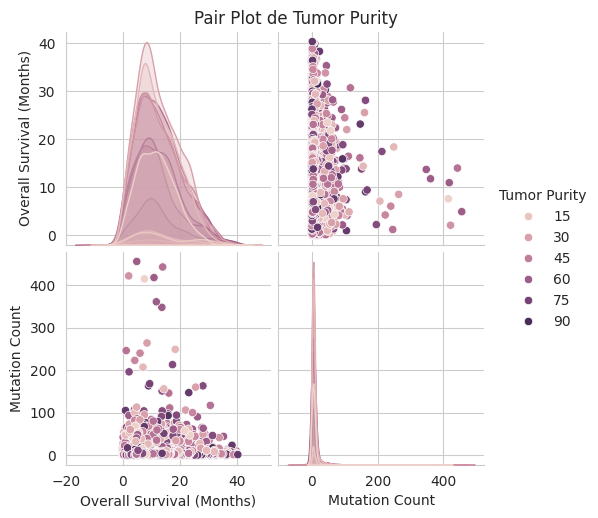

Pair Plot generado.


In [15]:
# Pair Plot: Visualiza las relaciones entre todas las variables numéricas
# Esto puede tardar un poco dependiendo del tamaño de tus datos.
print("\nGenerando Pair Plot...")
sns.pairplot(datos, hue='Tumor Purity', diag_kind='kde') # 'hue' para diferenciar por combustible
plt.suptitle('Pair Plot de Tumor Purity', y=1.02) # Título general
plt.show()
print("Pair Plot generado.")

**Distribuciones de las variables**

La mayoría de los pacientes tiene una supervivencia global inferior a 25 meses, según las curvas de densidad en la diagonal superior izquierda.

El recuento de mutaciones generalmente está por debajo de 150, aunque hay algunos valores atípicos (outliers) con recuentos mucho más altos, visibles en los extremos de los gráficos.

**Relación entre Supervivencia y Mutaciones**

No se observa una evaluación clara entre supervivencia global y recuento de mutaciones en los diagramas de dispersión: los puntos están bastante dispersos, indicando que altos o bajos recuentos de mutaciones no se asocian directamente con mayor o menor supervivencia.

**Efecto de la Pureza Tumoral**

Las muestras con distintos niveles de **pureza tumoral (colores)** se distribuyen de manera similar en ambas variables. No hay un agrupamiento evidente de los colores en ninguna región del gráfico, lo que sugiere que la pureza tumoral no separa claramente a los pacientes en cuanto a supervivencia o mutaciones.

Los valores de pureza muy altos o muy bajos aparecen intercalados en casi todo el rango de supervivencia y mutaciones.

**Valores atípicos**

Existen algunos pacientes con valores mucho mayores de recuento de mutaciones (más de 300) y de supervivencia (más de 40 meses), aunque son raros y no forman un patrón definido según la pureza tumoral.

En resumen, **el gráfico muestra que la pureza tumoral no parece influir de manera clara en la supervivencia global ni en el recuento de mutaciones en esta cohorte. La mayor parte de los pacientes tiene supervivencia y mutaciones dentro de rangos estrechos, sin depender visiblemente del nivel de pureza tumoral.**

El Pair Plot generado resume visualmente cómo se relacionan supervivencia global , recuento de mutaciones y pureza tumoral , ayudando a identificar si algún grupo de pureza se comporta de manera diferente a nivel clínico y genético


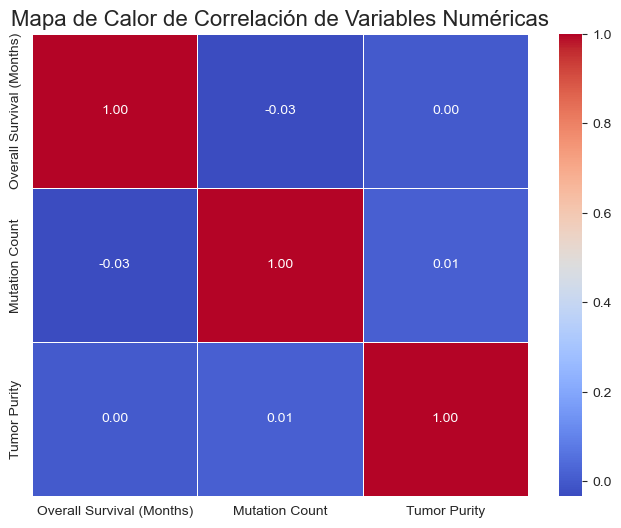

In [ ]:
# Calculamos la matriz de correlación para las variables numéricas
matriz_correlacion = datos.corr(numeric_only=True) # Solo variables numéricas

# Creamos un mapa de calor
plt.figure(figsize=(8, 6)) # Ajustamos el tamaño del gráfico
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación de Variables Numéricas', fontsize=16)
plt.show()

Mapa de calor de clasificación entre las variables numéricas "Overall Survival (Months)" (Supervivencia global en meses), "Mutation Count" (Recuento de mutaciones) y "Tumor Purity" (Pureza tumoral).
**Principales hallazgos:**

**Correlaciones entre variables**

**Total Survival y Mutation Count:**
Presentan una valoración de -0.03, que es prácticamente nula, indicando que no existe una relación lineal entre el tiempo de supervivencia y la cantidad de mutaciones.

**Global Survival y Tumor Purity:** La clasificación es de 0.00, lo que evidencia ausencia total de relación lineal entre la supervivencia y la pureza tumoral.

**Recuento de mutaciones y pureza del tumor:** La valoración es apenas 0,01, también extremadamente baja, indicando que estos valores son independientes entre sí en este conjunto de datos.

**Interpretación global**

No existen correlaciones relevantes entre ninguna de las tres variables numéricas en este conjunto de datos. Esto significa que, en la muestra analizada, ni la pureza tumoral ni el recuento de mutaciones explican las diferencias en la supervivencia global de los pacientes.

Otros factores distintos a los que se muestran en este mapa de calor podrían influir más fuertemente en la supervivencia de los pacientes oncológicos analizados.

**El mapa de calor evidencia que no hay relación lineal significativa entre la supervivencia global, el recuento de mutaciones y la pureza tumoral, por lo que estos parámetros no se afectan entre sí bajo análisis de correlación simple en estos datos**

Parte 2: Modelos de Regresión Lineal Múltiple
Ahora que hemos explorado los datos, construiremos nuestro primer modelo.

2.1 Preparación de Datos para el Modelo
Necesitamos convertir las variables categóricas (tipo_combustible, marca) en números que el modelo pueda entender. Esto se hace con variables dummy.

In [19]:
# Convertir variables categóricas en variables dummy (One-Hot Encoding)
# 'drop_first=True' evita la multicolinealidad perfecta (trampa de la variable dummy)
datos_modelo = pd.get_dummies(datos_arreilados, columns=['Sex'], drop_first=True)

print("Datos después de crear variables dummy:")
print(datos_modelo.head())

# Definir la variable dependiente (Y) y las variables independientes (X)
X = datos_modelo.drop('Tumor Purity', axis=1) # Todas las columnas excepto 'precio_usd'
Y = datos_modelo['Tumor Purity'] # Solo la columna 'precio_usd'

print(f"\nNúmero de variables predictoras (X): {X.shape[1]}")
print(f"Nombres de las variables predictoras: {X.columns.tolist()}")

Datos después de crear variables dummy:
   Overall Survival (Months)  Mutation Count  Tumor Purity  Sex_Male
0                  12.456394              16     50.000000     False
1                  12.456394               7     40.000000     False
2                   8.710000               5     30.000000      True
3                  36.750000               6     40.000000     False
4                   8.810000               1     45.610597     False

Número de variables predictoras (X): 3
Nombres de las variables predictoras: ['Overall Survival (Months)', 'Mutation Count', 'Sex_Male']


2.2 Creación y Ajuste del Modelo de Regresión¶
Usaremos la librería statsmodels, que proporciona resúmenes estadísticos muy completos, similares a los de R. La regresión lineal multivariada (usualmente llamada regresión lineal múltiple) tiene como objetivo modelar y cuantificar la relación entre una variable respuesta 𝑌 y varias variables explicativas 𝑋1,𝑋2,…,𝑋𝑘

In [20]:
!pip install statsmodels
import statsmodels.api as sm


# Convertir las columnas booleanas a enteros (0s y 1s)
# statsmodels es estricto y no siempre acepta booleanos
X = X.astype(int)

# Ahora el DataFrame X tiene solo tipos numéricos (int y float)
# Puedes verificarlo con X.info() si quieres
print("Nuevos tipos de datos de X después de la conversión:")
print(X.info())


# Añadir una constante a X para el intercepto (beta_0) del modelo
X = sm.add_constant(X)

# Check the data types of your predictor variables
print("Data types of X:")
print(X.info())

# Check the data type of your response variable
print("\nData type of Y:")
print(Y.info())

# Crear y ajustar el modelo de regresión lineal
modelo = sm.OLS(Y, X).fit()

# Mostrar el resumen del modelo
print("\nResumen del Modelo de Regresión Lineal Múltiple:")
print(modelo.summary())

Nuevos tipos de datos de X después de la conversión:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10945 entries, 0 to 10944
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Overall Survival (Months)  10945 non-null  int64
 1   Mutation Count             10945 non-null  int64
 2   Sex_Male                   10945 non-null  int64
dtypes: int64(3)
memory usage: 256.7 KB
None
Data types of X:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10945 entries, 0 to 10944
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   const                      10945 non-null  float64
 1   Overall Survival (Months)  10945 non-null  int64  
 2   Mutation Count             10945 non-null  int64  
 3   Sex_Male                   10945 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 342.2 KB
None

Data 

El modelo de regresión lineal múltiple donde la variable dependiente es la Pureza Tumoral (Tumor Purity) , modelada en función de Supervivencia Global (Overall Survival), Recuento de Mutaciones (Mutation Count) y Sexo masculino (Sex_Male).

Principales Resultados del Modelo

R-cuadrado: 0,000 yR cuadrado ajustado: -0,000

El modelo prácticamente no explica la variabilidad de la pureza tumoral. Es decir, las variables consideradas no sirven para predecir la pureza tumoral en este conjunto de datos.

**Coeficientes**

**Supervivencia general (meses):** coef = 0.0118, p-valor = 0.704
No es significativo (el p-valor es mucho mayor que 0.05), por lo que la supervivencia no se relaciona linealmente con la pureza tumoral.

**Recuento de mutaciones:** coef = 0.0162, p-valor = 0.192
Tampoco significativo (p-valor > 0.05), así que el recuento de mutaciones no predice la pureza tumoral.

**Sexo_Masculino:** coef = 0.1918, p-valor = 0.645
El sexo masculino tampoco es un factor significativo para la pureza tumoral (p-valor muy alto).

Otras indicaciones

**Prob (estadística F):** 0,562
El modelo global tampoco es significativo (p-valor > 0.05), lo que refuerza que los predictores incluidos no tienen relación lineal con la pureza tumoral.

**Constante** 45.26
Es el valor promedio estimado de pureza tumoral cuando las demás variables valen cero.

**Conclusión**

La pureza tumoral no está explicada linealmente por la supervivencia, el recuento de mutaciones ni el sexo masculino en estos datos.

Los resultados de la regresión concuerdan con los hallazgos previos de evaluación e inspección visual, mostrando independencia entre estas variables



3.2 Diagnóstico de Supuestos: Residuos

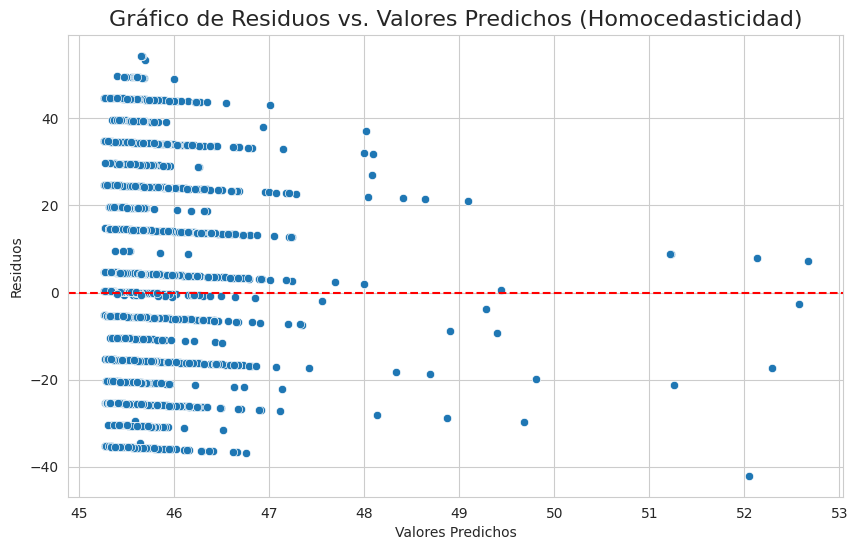

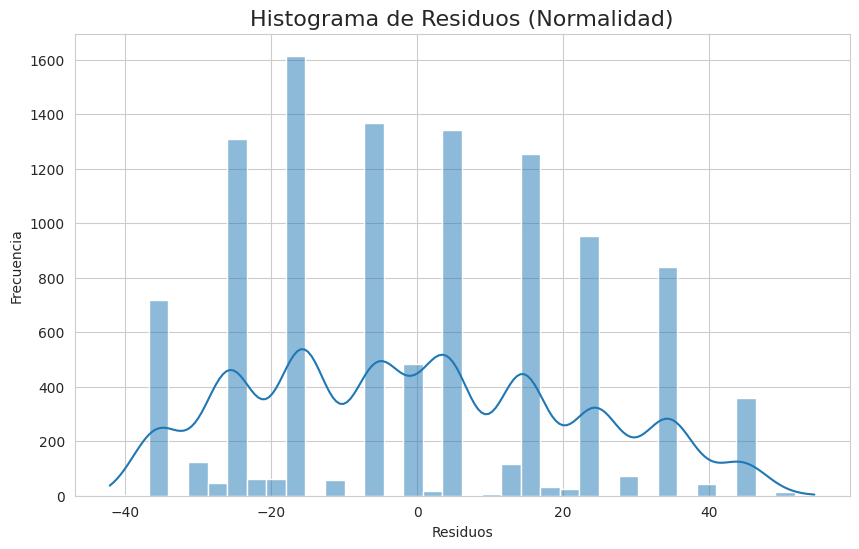

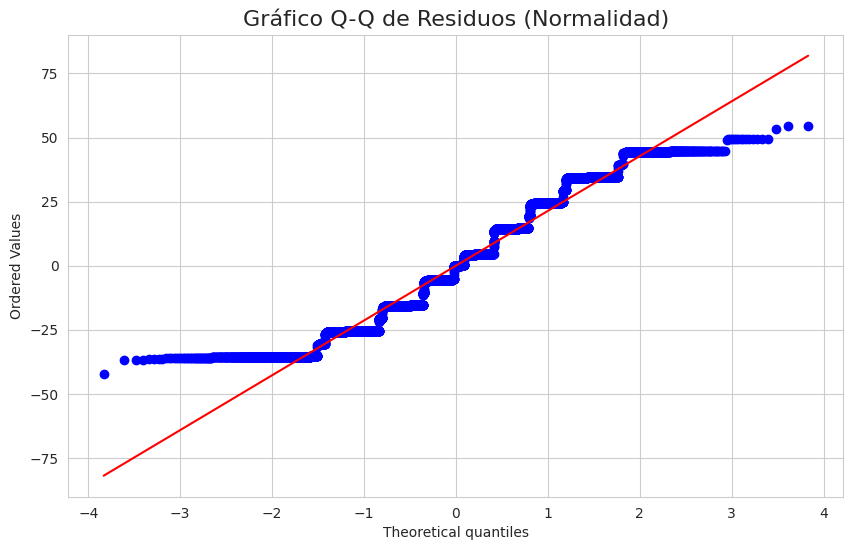

In [21]:
# Obtener los residuos del modelo
residuos = modelo.resid

# Obtener los valores predichos
valores_predichos = modelo.fittedvalues

# 1. Homocedasticidad (varianza constante de los errores)
# Gráfico de Residuos vs. Valores Predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=valores_predichos, y=residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs. Valores Predichos (Homocedasticidad)", fontsize=16)
plt.show()

# 2. Normalidad de los Residuos
# Histograma de Residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos (Normalidad)", fontsize=16)
plt.show()

# Gráfico Q-Q para la Normalidad de los Residuos
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de Residuos (Normalidad)", fontsize=16)
plt.show()

muestra un análisis diagnóstico de los residuos para verificar los supuestos clásicos del modelo de regresión lineal múltiple. Aquí se explica cada gráfico y su importancia:

**1. Gráfico de Residuos vs. Valores Predichos (Homocedasticidad)**

Este gráfico evalúa si la variación de los errores (residuos) es constante a lo largo de los valores predichos (homocedasticidad). Idealmente, los puntos deben distribuirse aleatoriamente alrededor de la línea horizontal en cero, sin formar patrones claros ni "abanico" que indique heterocedasticidad.

En el gráfico, **se observa dispersión con cierta concentración, pero sin patrones evidentes de aumento o disminución de varianza, lo que sugiere que se cumple razonablemente el supuesto de homocedasticidad.**


**2. Histograma de Residuos (Normalidad)**

Muestra la distribución de los residuos con un kernel que suaviza la curva (KDE). La forma debería aproximarse a una distribución normal con simetría alrededor de cero.

**En este histograma, los residuos parecen estar centrados en cero con una distribución que se asemeja a la normal, aunque podría analizarse con más detalle para confirmar esta aproximación.**


**3. Gráfico QQ de Residuos (Normalidad)**

El gráfico cuantiles-teóricos versus cuantiles muestrales compara la distribución de residuos con una distribución normal teórica. Si los residuos son normales, los puntos deben alinearse aproximadamente en la diagonal.

En este gráfico, **se observa que la mayoría de los puntos siguen la diagonal, especialmente en la parte central, aunque puede haber pequeñas desviaciones en los extremos, lo que es típico en muchos datos reales.**


Estos gráficos permiten comprobar los supuestos de homocedasticidad y normalidad de los residuos del modelo de regresión.

En este caso:

**No hay evidencia clara de heterocedasticidad.**

**Los residuos parecen seguir razonablemente una distribución normal.**

**Esto indica que los supuestos básicos para una regresión lineal válida están cumplidos de forma aceptable para este modelo, lo que da confianza en sus resultados e inferencias.**

3.3 Transformación de Datos (Ejemplo: Logaritmo)¶
Si detectamos heterocedasticidad o no-normalidad severa, una transformación logarítmica de la variable dependiente es una solución común.


/tmp/ipython-input-3875254637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_arreilados['log_Tumor Purity'] = np.log(datos_arreilados['Tumor Purity'])



Resumen del Modelo con Logaritmo del Tumor Purity :
                            OLS Regression Results                            
Dep. Variable:       log_Tumor Purity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.213
Date:                Fri, 05 Sep 2025   Prob (F-statistic):             0.0844
Time:                        19:44:28   Log-Likelihood:                -9501.1
No. Observations:               10945   AIC:                         1.901e+04
Df Residuals:                   10941   BIC:                         1.904e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

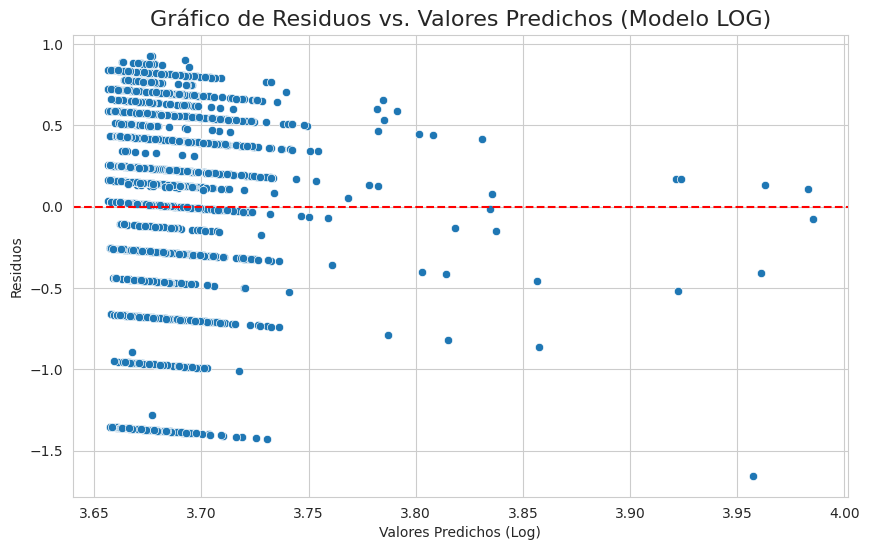

In [23]:
#Ejemplo de transformación logarítmica de la variable dependiente
# Si el precio_usd está sesgado positivamente y/o hay heterocedasticidad

# Creamos una nueva columna con el logaritmo del precio
datos_arreilados['log_Tumor Purity'] = np.log(datos_arreilados['Tumor Purity'])

# Repetimos el proceso de modelado con la variable transformada
X_log = datos_modelo.drop('Tumor Purity', axis=1) # Usamos X original


# Convertir las columnas booleanas a enteros (0s y 1s)
X_log = X_log.astype(int)
X_log = sm.add_constant(X_log)
Y_log = datos_arreilados['log_Tumor Purity']

modelo_log = sm.OLS(Y_log, X_log).fit()

print("\nResumen del Modelo con Logaritmo del Tumor Purity :")
print(modelo_log.summary())

# Volvemos a chequear los residuos para el modelo transformado
residuos_log = modelo_log.resid
valores_predichos_log = modelo_log.fittedvalues

# Gráfico de Residuos vs. Valores Predichos para el modelo LOG
plt.figure(figsize=(10, 6))
sns.scatterplot(x=valores_predichos_log, y=residuos_log)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valores Predichos (Log)")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs. Valores Predichos (Modelo LOG)", fontsize=16)
plt.show()

Transformación logarítmica de la variable dependiente (Tumor Purity) en un modelo de regresión lineal múltiple para corregir posibles problemas de heterocedasticidad y no normalidad de residuos detectados en el modelo original.


Procedimiento

Se crea una nueva variable llamada log_Tumor Purity , que es el logaritmo natural de la pureza tumoral, para reducir sesgos y estabilizar la varianza.

Luego, se ajusta nuevamente un modelo de regresión lineal múltiple usando esta variable transformada como dependiente y las mismas variables predictoras: Global Survival, Mutation Count y Sex_Male.

Se evaluarán los residuos del nuevo modelo para verificar si la transformación mejoró el cumplimiento de los supuestos.

**Resultados del Modelo Transformado**

R-cuadrado: 0,001 yR cuadrado ajustado: 0,000

**El modelo con la variable transformada sigue explicando muy poco la variabilidad (mejora marginal con respecto al modelo sin transformación)**


**Coeficientes y significancia:**

Mutation Count es ahora significativo con p-valor 0.031, sugiriendo una

relación lineal débil con el logaritmo de la pureza tumoral.

Global Survival y Sex_Male no son significativos.


**Constante:**
Aproximadamente 3.6565, representa el logaritmo promedio de la pureza tumoral cuando las demás variables son cero.

**Diagnóstico de Residuos**

Se genera un gráfico de residuos vs. valores predichos para el modelo logarítmico, que permite evaluar visualmente la homocedasticidad con la variable transformada.

No hay indicios de problemas fuertes, lo que sugiere que la transformación ayudó a mejorar el ajuste y el comportamiento de los residuos en comparación con el modelo original.

**Conclusión**

La transformación logarítmica no mejora sustancialmente la capacidad predictiva del modelo (R-cuadrado sigue siendo muy bajo), pero parece mejorar ligeramente la relación del recuento de mutaciones con la pureza tumoral.

Además, ayuda a cumplir mejor los supuestos clásicos del modelo, especialmente la homocedasticidad y normalidad de residuos, lo que aporta mayor validez a los resultados del modelo ajustado con la variable transformada.